# Convariance Matrix for 2 node graph with feedback loops


A linear SCM with feedback loops is not a DAG, but
it can be "unrolled" into a DAG showing "time-slices" $n=1, 2, \ldots$.
Here $n$ is an integer, corresponding to time, that labels the time-slices.
If you remove the arrows connecting the time-slices (SCuMpy draws those arrows in solid green),
you get a legal DAG for each time-slice. We assume that the DAG for a single time-slice is the same for each 
time-slice.

Let 

CMinfo = single time covariance matrices $C^{[n]}_{i,j}=\langle \underline{x}_i^{[n]}, \underline{x}_j^{[n]}\rangle$ and $C^{[n+1]}_{i,j}=\langle \underline{x}_i^{[n+1]}, \underline{x}_j^{[n+1]}\rangle$, and two-times covariance matrix $C^{[n, n+1]}_{i,j}=\langle \underline{x}_i^{[n]}, \underline{x}_j^{[n+1]}\rangle$.

$A=$ strictly lower triangular matrix with entries $\alpha_{i|j}$ = gain of arrow 
$x^{[n]}_j\rightarrow x^{[n]}_i$

$B=$ matrix with entries $\beta_{i|j}$ = gain of arrow 
$x^{[n]}_j\rightarrow x^{[n+1]}_i$

In my book Bayesuvius, in the chapter entitled 
"LDEN with feedback loops", I derive the solution, in closed form,
for **CMinfo expressed in terms of $A$ and $B$**.
That solution is now programmed into SCuMpy. The purpose of this notebook is
to illustrate how to use SCuMpy to calculate that solution, in symbolic form.
We consider in this notebook the simplest possible DAG for a single time-slice; namely, the two node DAG.
However, SCuMpy can handle an arbitrary, with more than 2 nodes, DAG for a single time-slice, and it can handle all possible arrows between the nodes 
of two adjacent time-slices.

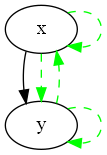

In [2]:
from FBackGraph import *
path = 'dot_atlas/fback-2node.dot'
graph = FBackGraph(path)
# draw linear SCM as single time-slice with feedback arrows (green dashed lines)
graph.draw(jupyter=True)

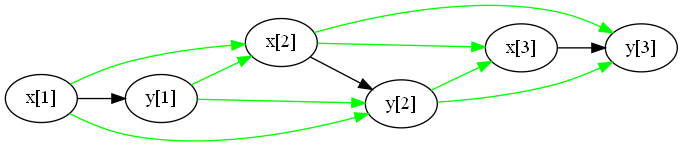

In [3]:
# Unroll linear SCM with feedback loops so as to show 
# 3 time-slices connected by solid green feedback arrows.
# Ask for time to point to the right instead of the default behavior, down.
graph.draw(jupyter=True, slices=3, point_right=True)

In my book Bayesuvius, in the chapter entitled 
"LDEN with feedback loops", I show that

$\langle\underline{x}^{[n]},\underline{x}^{[n]T}\rangle=\quad G^{n-1}\quad C_1 \quad (G^T)^{n-1}$

where

$n=1,2,3 \dots$ integer corresponding to time

$A$= strictly lower triangular matrix with gains $\alpha_{i|j}$ (gain
for arrow $x^{[n]}_j\rightarrow x^{[n]}_i$) as entries

$B=$ matrix with feedback gains $\beta_{i|j}$ (gain
for arrow $x^{[n]}_j\rightarrow x^{[n+1]}_i$)
as entries

$I_A = 1 - A$

$C_1=\langle\underline{x}^{[1]},\underline{x}^{[1]T}\rangle$ = initial covariance matrix = $I_A^{-1}
diag(\sigma^2_{\underline{\epsilon}_i})
 (I_A^{-1})^T$

G = growth matrix = $I_A^{-1}B$

In [4]:
from FBackCovMatCalculator import *
cal = FBackCovMatCalculator(graph)
cal.calculate_cov_mat_sb()
# print entries of C_1 matrix
cal.print_initial_cov_mat_entries()

\begin{array}{l}
\left\langle\underline{x}^{[1]}, \underline{x}^{[1]}\right\rangle=\sigma^2_{\underline{\epsilon}_{\underline{x}}}
\\
\left\langle\underline{x}^{[1]}, \underline{y}^{[1]}\right\rangle=\alpha_{\underline{y}|\underline{x}} \sigma^2_{\underline{\epsilon}_{\underline{x}}}
\\
\left\langle\underline{y}^{[1]}, \underline{x}^{[1]}\right\rangle=\alpha_{\underline{y}|\underline{x}} \sigma^2_{\underline{\epsilon}_{\underline{x}}}
\\
\left\langle\underline{y}^{[1]}, \underline{y}^{[1]}\right\rangle=\alpha_{\underline{y}|\underline{x}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{x}}} + \sigma^2_{\underline{\epsilon}_{\underline{y}}}
\end{array}

In [5]:
# print entries of G matrix
cal.print_growth_mat_entries()

\begin{array}{l}
G_{0=\underline{x},0=\underline{x}}=\beta_{\underline{x}|\underline{x}}
\\
G_{0=\underline{x},1=\underline{y}}=\beta_{\underline{x}|\underline{y}}
\\
G_{1=\underline{y},0=\underline{x}}=\alpha_{\underline{y}|\underline{x}} \beta_{\underline{x}|\underline{x}} + \beta_{\underline{y}|\underline{x}}
\\
G_{1=\underline{y},1=\underline{y}}=\alpha_{\underline{y}|\underline{x}} \beta_{\underline{x}|\underline{y}} + \beta_{\underline{y}|\underline{y}}
\end{array}